Using Bertam's Analytic solutions for optimal statistical arbitrage trading and Optimal trading strategies for Ito diffusion processes 

We model the price of a spread $ {s}_{t} $ as,

$$
{s}_{t} = {e}^{{X}_{t}}
$$

Where ${X}_{t} $ satisfies the following stochastic equation, 

$$
{dX}_{t} = {-}\alpha{X}_{t}{dt}{ + }\sigma{dW}_{t}
$$

and $\alpha > 0 $, $\sigma > 0$, and ${W}_{t}$ is a Wiener process

A continuous time trading strategy is defined by entering a trade when, ${X}_{t} = {a}$, exiting the trade when ${X}_{t} = {m}$, and waiting until the process returns to ${X}_{t} = {a}$ 

The goal of the strategy is to determine appropriate levels for ${a}$ and ${m}$ such that expected return is maximised or maximising with respect to sharpe ratio. 


### Mazimising Expected return
Using Bertram's equation (18) we can find the value for ${a}$ that maximises expected return for the strategy. Using values obtained for $\alpha$, $\sigma$ and transaction costs ${c}$, where ${a} < 0$ and ${m} = -{a}$. 

$${a} = -\frac{c}{4} - \frac{{c}^{2}{\alpha}}{4({c^3}{\alpha^3} + 24{c}{\alpha^2}{\sigma^2} -4{\sqrt{3{c^4}{\alpha^5}{\sigma^2} + 36{c^2}{\alpha^4}{\sigma}}})^{1/3}}- \frac{({c^3}{\alpha^3} + 24{c}{\alpha^2}{\sigma^2} -4{\sqrt{3{c^4}{\alpha^5}{\sigma^2} +36{c^2}{\alpha^4}{\sigma^4}}})^{1/3}}{4{\alpha}}$$


Below displays the calculation and the validation for the maximum epected return

In [ ]:
import numpy as np
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~FUNCTION: Max Expected Return~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Inputs: 
#     - a -> alpha value found through calibration of the OU process
#     - n -> sigma vlue found through calibration of the OU process
#     - c -> transaction costs 
# Output:
#   the function calculate optimal entry threshold, a, in accordance with bertrams function 
def mer(a,n,c):
    var1 = -c/4
    denom1 = (c**3*a**3) + (24*c*a**2*n**2)
    denom2 = 4*(np.sqrt(((3*c**4*a**5*n**2) + (36*c**2*a**4*n**4))))
    denom3 = 4 * ((denom1 - denom2)**(1/3))
    var2 = (c**2*a) / denom3
    numer1 = c**3*a**3 + (24*c*a**2*n**2)
    numer2 = 4 * np.sqrt((3*c**4*a**5*n**2 + 36*c**2*a**4*n**4))
    numer3 = ((numer1 - numer2))**(1/3)
    var3 = numer3 / (4*a)
    res = var1 - var2 - var3
    return res

In [15]:
# Validation 
a = {}
#calculate a with varying trsnsaction costs 

for i in [0.001,0.002,0.003,0.004,0.005,0.006,0.006,0.015, 0.0175,0.02]:
    a[i] = mer(180.967,0.1538,i)
    print ( mer(180.967,0.1538,i))

-0.00487500478007779
-0.006354930125607594
-0.007491010302362016
-0.008468243601591667
-0.009353129481214492
-0.010178034089253355
-0.010178034089253355
-0.016591733968014284
-0.01826659145361514
-0.019934125311568858


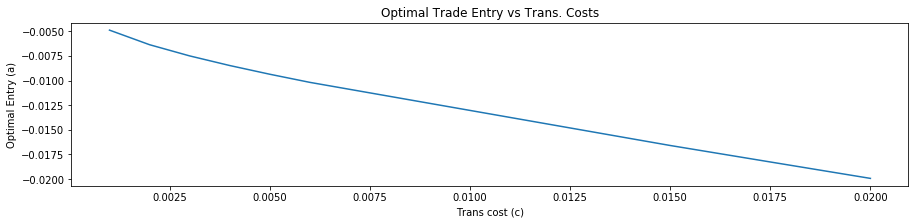

In [14]:
# Validation
import matplotlib.pyplot as plt
#plot ofoptimal entry vs transaction costs
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(*zip(*sorted(a.items())))
plt.xlabel('Trans cost (c)')
plt.ylabel('Optimal Entry (a)')
plt.title('Optimal Trade Entry vs Trans. Costs')
plt.show();